## Bible Crawling

In [1]:
import pandas as pd
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
url = "https://www.bskorea.or.kr/bible/korbibReadpage.php?version=GAE&book=gen&chap=1&sec=1&cVersion=&fontSize=15px&fontWeight=normal"
req = requests.get(url)

In [3]:
html = req.text
soup = BeautifulSoup(html, 'html.parser')

In [4]:
contents = soup.find_all('span', class_='')
contents

[<span style="color:#376BCB;"><span class="number">1    </span>태초에 하나님이 천지를 창조하시니라 </span>,
 <span><span class="number">2    </span>땅이 <font size="2"><a class="comment" href="#" onclick="return clickPopUp('D_184038_1', event)"><font size="2">1)</font></a></font>혼돈하고 공허하며 흑암이 깊음 위에 있고 하나님의 영은 수면 위에 운행하시니라
 
 <div class="D2" id="D_184038_1" onclick="popDown2('D_184038_1')" style="display:none;z-index:100">또는 형체가 없는 </div></span>,
 <span><span class="number">3    </span>하나님이 이르시되 빛이 있으라 하시니 빛이 있었고 </span>,
 <span><span class="number">4    </span>빛이 하나님이 보시기에 좋았더라 하나님이 빛과 어둠을 나누사</span>,
 <span><span class="number">5    </span>하나님이 빛을 낮이라 부르시고 어둠을 밤이라 부르시니라 저녁이 되고 아침이 되니 이는 첫째 날이니라 </span>,
 <span><span class="number">6    </span><font size="1"></font>하나님이 이르시되 물 가운데에 궁창이 있어 물과 물로 나뉘라 하시고 </span>,
 <span><span class="number">7    </span>하나님이 궁창을 만드사 궁창 아래의 물과 궁창 위의 물로 나뉘게 하시니 그대로 되니라 </span>,
 <span><span class="number">8    </span>하나님이 궁창을 하늘이라 부르시니라 저녁이 되고 아침이 되니 이는 둘째 날이니라 </span>,
 <sp

In [5]:
text = []
for c in contents:
    text.append(c.text.replace('\xa0', ''))

In [6]:
text

['1 태초에 하나님이 천지를 창조하시니라 ',
 '2 땅이 1)혼돈하고 공허하며 흑암이 깊음 위에 있고 하나님의 영은 수면 위에 운행하시니라\n\n또는 형체가 없는 ',
 '3 하나님이 이르시되 빛이 있으라 하시니 빛이 있었고 ',
 '4 빛이 하나님이 보시기에 좋았더라 하나님이 빛과 어둠을 나누사',
 '5 하나님이 빛을 낮이라 부르시고 어둠을 밤이라 부르시니라 저녁이 되고 아침이 되니 이는 첫째 날이니라 ',
 '6 하나님이 이르시되 물 가운데에 궁창이 있어 물과 물로 나뉘라 하시고 ',
 '7 하나님이 궁창을 만드사 궁창 아래의 물과 궁창 위의 물로 나뉘게 하시니 그대로 되니라 ',
 '8 하나님이 궁창을 하늘이라 부르시니라 저녁이 되고 아침이 되니 이는 둘째 날이니라 ',
 '9 하나님이 이르시되 천하의 물이 한 곳으로 모이고 뭍이 드러나라 하시니 그대로 되니라 ',
 '10 하나님이 뭍을 땅이라 부르시고 모인 물을 바다라 부르시니 하나님이 보시기에 좋았더라 ',
 '11 하나님이 이르시되 땅은 풀과 씨 맺는 채소와 각기 종류대로 씨 가진 열매 맺는 나무를 내라 하시니 그대로 되어 ',
 '12 땅이 풀과 각기 종류대로 씨 맺는 채소와 각기 종류대로 씨 가진 열매 맺는 나무를 내니 하나님이 보시기에 좋았더라 ',
 '13 저녁이 되고 아침이 되니 이는 셋째 날이니라 ',
 '14 하나님이 이르시되 하늘의 궁창에 2)광명체들이 있어 낮과 밤을 나뉘게 하고 그것들로 징조와 계절과 날과 해를 이루게 하라 \n\n히, 또는 발광체',
 '15 또 광명체들이 하늘의 궁창에 있어 땅을 비추라 하시니 그대로 되니라',
 '16 하나님이 두 큰 광명체를 만드사 큰 광명체로 낮을 주관하게 하시고 작은 광명체로 밤을 주관하게 하시며 또 별들을 만드시고 ',
 '17 하나님이 그것들을 하늘의 궁창에 두어 땅을 비추게 하시며 ',
 '18 낮과 밤을 주관하게 하시고 빛과 어둠을 나뉘게 하시니 하나님이 보시기에 좋았더라 ',
 '19 저녁이 되고 아침이 되니 이는 넷째 날이

In [22]:
from krwordrank.word import KRWordRank

wordrank_extractor = KRWordRank(
    min_count = 2, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 5, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(text, beta, max_iter)

for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

scan vocabs ... 
num vocabs = 303
done = 10
    하나님이:	7.0235
    이르시되:	3.3249
      모든:	2.8772
     하늘의:	2.6883
      땅에:	2.6472
    보시기에:	2.2174
     하시니:	2.1462
    종류대로:	2.0469
    좋았더라:	1.9712
      되니:	1.7365
     저녁이:	1.6783
      궁창:	1.5689
      되고:	1.4886
     그대로:	1.4758
      밤을:	1.4214
      맺는:	1.4167
     바다의:	1.3840
    날이니라:	1.3321
      땅을:	1.3044
    번성하여:	1.2913
      각기:	1.2059
     생물을:	1.1564
    생육하고:	1.1374
     사람을:	1.1071
      복을:	1.0697
      있어:	1.0225
      땅의:	0.9690
     어둠을:	0.9601
    그들에게:	0.9433
     아침이:	0.9162


In [30]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
alice_mask = np.array(Image.open("alice_mask.png"))

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white",
    mask = alice_mask
)

wordcloud = wordcloud.generate_from_frequencies(keywords)

In [36]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

<class 'numpy.ndarray'>
(900, 900, 3)


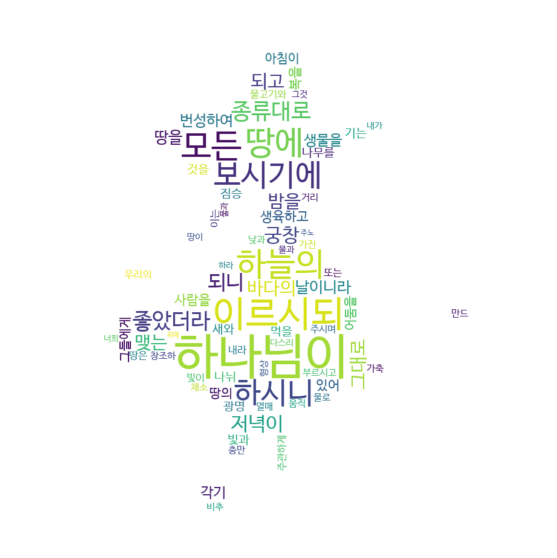

In [37]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.show()